<a href="https://colab.research.google.com/github/Soyeon-ErinLee/Machine_Learning/blob/master/0824_6_16SSS%EA%B5%AC%ED%98%84(with%EA%B8%B0%ED%83%80%EA%B3%B5%EA%B0%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data organizing
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# pixel data
import pandas as pd
pixel = pd.read_csv("/content/drive/Shared drives/2020 KU datathon/Visualization/roompixel.txt",sep="=",header=None,names=['roomid','pixel'])
extra=pixel[pixel.roomid.str.startswith("f")] # 기타학습공간
room=pixel[pixel.roomid.str.startswith("r")] # 캐럴, 스룸 
room["realroomid"]=room.roomid.str.split("r").str[1]

roomB1 = room[room.realroomid.str.startswith("B")]
room2 = room[room.realroomid.str.startswith("2")]
room3 = room[room.realroomid.str.startswith("3")]
room4 = room[room.realroomid.str.startswith("4")]
room5 = room[room.realroomid.str.startswith("5")]

extra["realroomid"]=extra.roomid.str.split("floor").str[1]

extraB1 = extra[extra.realroomid.str.startswith("B")]
extra1 = extra[extra.realroomid.str.startswith("1")]
extra2 = extra[extra.realroomid.str.startswith("2")]
extra3 = extra[extra.realroomid.str.startswith("3")]
extra4 = extra[extra.realroomid.str.startswith("4")]
extra5 = extra[extra.realroomid.str.startswith("5")]

# combined data for x,y location 

combinedB1 = pd.concat([roomB1,extraB1],axis=0)
combinedB1["x"]=combinedB1.pixel.str.strip("()").str.split(",").str[0].astype(float)
combinedB1["y"]=combinedB1.pixel.str.strip("()").str.split(",").str[1].astype(float)

# B1층 B101 B111 B112 처리
nosensor = combinedB1[(combinedB1.roomid == 'rB101')|(combinedB1.roomid == 'rB111')|(combinedB1.roomid == 'rB112')]
combinedB1 = combinedB1[-(combinedB1.roomid == 'rB101')]
combinedB1 = combinedB1[-(combinedB1.roomid == 'rB111')]
combinedB1 = combinedB1[-(combinedB1.roomid == 'rB112')]
combinedB1 = pd.concat([combinedB1,nosensor],axis=0)


combined1 = extra1
combined1["x"]=combined1.pixel.str.strip("()").str.split(",").str[0].astype(float)
combined1["y"]=combined1.pixel.str.strip("()").str.split(",").str[1].astype(float)

combined2 = pd.concat([room2,extra2],axis=0)
combined2["x"]=combined2.pixel.str.strip("()").str.split(",").str[0].astype(float)
combined2["y"]=combined2.pixel.str.strip("()").str.split(",").str[1].astype(float)

combined3 = pd.concat([room3,extra3],axis=0)
combined3["x"]=combined3.pixel.str.strip("()").str.split(",").str[0].astype(float)
combined3["y"]=combined3.pixel.str.strip("()").str.split(",").str[1].astype(float)

combined4 = pd.concat([room4,extra4],axis=0)
combined4["x"]=combined4.pixel.str.strip("( )").str.split(",").str[0].astype(float)
combined4["y"]=combined4.pixel.str.strip("( )").str.split(",").str[1].astype(float)

combined5 = pd.concat([room5,extra5],axis=0)
combined5["x"]=combined5.pixel.str.strip("()").str.split(",").str[0].astype(float)
combined5["y"]=combined5.pixel.str.strip("()").str.split(",").str[1].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [ ]:
# 스룸, 캐럴 data 
import pandas as pd
dataw=pd.read_csv("/content/drive/Shared drives/2020 KU datathon/data/0616SSSdata.csv")
dataw = dataw.drop(["Unnamed: 0"],axis=1)
dataw.head(6)

,time_stamp_s,fire,dust,temperature,humidity,co2,moving,door,roomid,floor,co2score,dustscore,humidscore,temp1score,temp2score,totalscore,SSS
0,2020-06-16 05:02:27,0,29,22.834448,52.352936,751,0,0,202,floor2,40,80,100,50,75,67.5,4
1,2020-06-16 05:02:27,0,34,22.491245,52.299530,768,0,0,203,floor2,40,80,100,50,75,67.5,4
2,2020-06-16 05:02:27,0,34,21.965715,54.870636,742,0,0,204,floor2,60,80,100,50,75,72.5,4
3,2020-06-16 05:02:27,0,28,23.081125,49.728424,781,0,0,205,floor2,40,80,100,50,75,67.5,4
4,2020-06-16 05:02:27,0,29,23.134751,49.926788,783,0,0,208,floor2,40,80,100,50,75,67.5,4
5,2020-06-16 18:16:28,0,74,22.941699,48.263580,775,0,0,301,floor3,40,60,100,50,75,62.5,4


In [ ]:
# import numpy as np
dataw['time_stamp_s'] = pd.to_datetime(dataw['time_stamp_s'])
data = dataw[dataw['time_stamp_s'].dt.time.astype(str)=='17:01:28'] # (201, 18) 원래는 17:00:28인데 141 결측치 있어서 1분으로 바꿈.

In [ ]:
#  기타공간 환경변수 예측  by 회귀, sss지수개발, 시각화

In [ ]:
import pandas as pd
# 기상청 데이터 (날짜 업데이트 필요)
weather = pd.read_csv("/content/drive/Shared drives/2020 KU datathon/Regression/0616weather_data.csv",sep=",")
weather = weather.iloc[:,0:2] 
outtemp = weather.temperature
outhumid = weather.humidity
outtemp1 = outtemp[0] # 첫번째 값 추출 
outhumid1 = outhumid[0]

In [ ]:
# 0616 17시 주변공간 data의 평균 
import pandas as pd
space = pd.read_csv("/content/drive/Shared drives/2020 KU datathon/주변공간.txt",sep=' ',header=None,index_col=0,
                    names=['r1','r2','r3','r4','r5','r6'])
space=space.drop('r6',axis=1)
list=space.values.tolist() # 0~20r

In [ ]:
list

[['B122', 'B123', 'B124', 'B125', 'B126'],
 ['B129', 'B130', 'B133', 'B134', 'B135'],
 ['B134', 'B135', 'B139', 'B141', nan],
 ['B107', 'B108', 'B109', 'B113', nan],
 ['202', '203', '221', '222', '223'],
 ['208', '221', '211', '212', '213'],
 ['215', '216', '218', '219', '220'],
 ['312', '313', '314', '315', nan],
 ['312', '313', '314', '315', '316'],
 ['320', '323', '324', '310', nan],
 ['308', '309', '310', '324', '325'],
 ['307', '308', '327', '328', '329'],
 ['327', '328', '329', nan, nan],
 ['4113', '4116', '4117', '4118', '4004'],
 ['4025', '4026', '4027', '4028', '4030'],
 ['4043', '4045', '4046', '4061', '4060'],
 ['4062', '4071', '4072', '4073', '4074'],
 ['503', '502', '506', '507', nan],
 ['514', '501', '515', nan, nan],
 ['515', '516', '517', nan, nan],
 ['515', '516', '517', nan, nan]]

In [ ]:
# 0616 17시 주변공간 data의 평균 
space = pd.read_csv("/content/drive/Shared drives/2020 KU datathon/주변공간.txt",sep=' ',header=None,index_col=0,
                    names=['r1','r2','r3','r4','r5','r6'])
space=space.drop('r6',axis=1)
list=space.values.tolist() # 0~20r

# B1층 각 기타공간의 주변 temp 평균 
meantempB1=[]
for i in range(4): # 지하 기타공간 4개 
  meantempB1.append(data[data.roomid.isin(list[i])]['temperature'].mean())

# B1층 각 기타공간의 주변 humid 평균 
meanhumidB1=[]
for i in range(4): 
  meanhumidB1.append(data[data.roomid.isin(list[i])]['humidity'].mean())

# B1층 각 기타공간의 주변 dust 평균 
meandustB1=[]
for i in range(4): 
  meandustB1.append(data[data.roomid.isin(list[i])]['dust'].mean())

# B1층 각 기타공간의 주변 co2 평균 
meanco2B1=[]
for i in range(4): 
  meanco2B1.append(data[data.roomid.isin(list[i])]['co2'].mean())

In [ ]:
# B1층 각 방별 주변 강의실 온도
tempB1A = []
tempB1B = []
tempB1C = []
tempB1D = []

for i in range(len(list[0])):
  tempB1A.append(data[data.roomid==list[0][i]]['temperature'].values)
  # np.array(tempB1A).T
for i in range(len(list[1])):
  tempB1B.append(data[data.roomid==list[1][i]]['temperature'].values)
for i in range(len(list[2])):
  tempB1C.append(data[data.roomid==list[2][i]]['temperature'].values)
for i in range(len(list[3])):
  tempB1D.append(data[data.roomid==list[3][i]]['temperature'].values)

# B1층 각 방별 주변 강의실 습도
humidB1A = []
humidB1B = []
humidB1C = []
humidB1D = []

for i in range(len(list[0])):
  humidB1A.append(data[data.roomid==list[0][i]]['humidity'].values)
  # np.array(tempB1A).T
for i in range(len(list[1])):
  humidB1B.append(data[data.roomid==list[1][i]]['humidity'].values)
for i in range(len(list[2])):
  humidB1C.append(data[data.roomid==list[2][i]]['humidity'].values)
for i in range(len(list[3])):
  humidB1D.append(data[data.roomid==list[3][i]]['humidity'].values)

In [ ]:
# 각 방별 온,습도
print(tempB1A)
print(tempB1B)
print(tempB1C)
print(tempB1D)

[array([20.667979]), array([20.903931]), array([20.635803]), array([20.303325]), array([20.517827])]
[array([21.525986]), array([21.021907]), array([21.021907]), array([21.89064]), array([21.665413])]
[array([21.89064]), array([21.665413]), array([22.233843]), array([22.223118]), array([], dtype=float64)]
[array([20.625078]), array([20.678704]), array([20.174624]), array([22.52342]), array([], dtype=float64)]


In [ ]:
print(humidB1A)
print(humidB1B)
print(humidB1C)
print(humidB1D)

[array([57.014496]), array([55.587799]), array([52.719147]), array([54.016144]), array([53.283722])]
[array([48.904449]), array([51.361115]), array([55.694611]), array([48.52298]), array([53.146393])]
[array([48.52298]), array([53.146393]), array([52.719147]), array([53.321869]), array([], dtype=float64)]
[array([52.795441]), array([56.152374]), array([57.960541]), array([51.521332]), array([], dtype=float64)]


In [ ]:
# 2층 
meantemp2=[]
for i in range(3): #기타공간 3개
  meantemp2.append(data[data.roomid.isin(list[i])]['temperature'].mean())


meanhumid2=[]
for i in range(3): 
  meanhumid2.append(data[data.roomid.isin(list[i])]['humidity'].mean())


meandust2=[]
for i in range(3): 
  meandust2.append(data[data.roomid.isin(list[i])]['dust'].mean())


meanco22=[]
for i in range(3): 
  meanco22.append(data[data.roomid.isin(list[i])]['co2'].mean())


temp2A = []
temp2B = []
temp2C = []


for i in range(len(list[4])):
  temp2A.append(data[data.roomid==list[4][i]]['temperature'].values)
  # np.array(tempB1A).T
for i in range(len(list[5])):
  temp2B.append(data[data.roomid==list[5][i]]['temperature'].values)
for i in range(len(list[6])):
  temp2C.append(data[data.roomid==list[6][i]]['temperature'].values)



humid2A = []
humid2B = []
humid2C = []


for i in range(len(list[4])):
  humid2A.append(data[data.roomid==list[4][i]]['humidity'].values)
for i in range(len(list[5])):
  humid2B.append(data[data.roomid==list[5][i]]['humidity'].values)
for i in range(len(list[6])):
  humid2C.append(data[data.roomid==list[6][i]]['humidity'].values)
  

In [ ]:

# 3층 
meantemp3=[]
for i in range(6): #기타공간 3개
  meantemp3.append(data[data.roomid.isin(list[i])]['temperature'].mean())


meanhumid3=[]
for i in range(6): 
  meanhumid3.append(data[data.roomid.isin(list[i])]['humidity'].mean())


meandust3=[]
for i in range(6): 
  meandust3.append(data[data.roomid.isin(list[i])]['dust'].mean())


meanco23=[]
for i in range(6): 
  meanco23.append(data[data.roomid.isin(list[i])]['co2'].mean())


temp3A = []
temp3B = []
temp3C = []
temp3D = []
temp3E = []
temp3F = []


for i in range(len(list[7])):
  temp3A.append(data[data.roomid==list[7][i]]['temperature'].values)
for i in range(len(list[8])):
  temp3B.append(data[data.roomid==list[8][i]]['temperature'].values)
for i in range(len(list[9])):
  temp3C.append(data[data.roomid==list[9][i]]['temperature'].values)
for i in range(len(list[10])):
  temp3D.append(data[data.roomid==list[10][i]]['temperature'].values)
for i in range(len(list[11])):
  temp3E.append(data[data.roomid==list[11][i]]['temperature'].values)
for i in range(len(list[12])):
  temp3F.append(data[data.roomid==list[12][i]]['temperature'].values)


humid3A = []
humid3B = []
humid3C = []
humid3D = []
humid3E = []
humid3F = []


for i in range(len(list[7])):
  humid3A.append(data[data.roomid==list[7][i]]['humidity'].values)
for i in range(len(list[8])):
  humid3B.append(data[data.roomid==list[8][i]]['humidity'].values)
for i in range(len(list[9])):
  humid3C.append(data[data.roomid==list[9][i]]['humidity'].values)
for i in range(len(list[10])):
  humid3D.append(data[data.roomid==list[10][i]]['humidity'].values)
for i in range(len(list[11])):
  humid3E.append(data[data.roomid==list[11][i]]['humidity'].values)
for i in range(len(list[12])):
  humid3F.append(data[data.roomid==list[12][i]]['humidity'].values)

# 4층

meantemp4=[]
for i in range(4): # 기타공간 4개 
  meantemp4.append(data[data.roomid.isin(list[i])]['temperature'].mean())


meanhumid4=[]
for i in range(4): 
  meanhumid4.append(data[data.roomid.isin(list[i])]['humidity'].mean())


meandust4=[]
for i in range(4): 
  meandust4.append(data[data.roomid.isin(list[i])]['dust'].mean())


meanco24=[]
for i in range(4): 
  meanco24.append(data[data.roomid.isin(list[i])]['co2'].mean())


temp4A = []
temp4B = []
temp4C = []
temp4D = []

for i in range(len(list[13])):
  temp4A.append(data[data.roomid==list[13][i]]['temperature'].values)
for i in range(len(list[14])):
  temp4B.append(data[data.roomid==list[14][i]]['temperature'].values)
for i in range(len(list[15])):
  temp4C.append(data[data.roomid==list[15][i]]['temperature'].values)
for i in range(len(list[16])):
  temp4D.append(data[data.roomid==list[16][i]]['temperature'].values)


humid4A = []
humid4B = []
humid4C = []
humid4D = []

for i in range(len(list[13])):
  humid4A.append(data[data.roomid==list[13][i]]['humidity'].values)
  # np.array(tempB1A).T
for i in range(len(list[14])):
  humid4B.append(data[data.roomid==list[4][i]]['humidity'].values)
for i in range(len(list[15])):
  humid4C.append(data[data.roomid==list[15][i]]['humidity'].values)
for i in range(len(list[16])):
  humid4D.append(data[data.roomid==list[16][i]]['humidity'].values)

# 5층

meantemp5=[]
for i in range(4): # 기타공간 4개 
  meantemp5.append(data[data.roomid.isin(list[i])]['temperature'].mean())


meanhumid5=[]
for i in range(4): 
  meanhumid5.append(data[data.roomid.isin(list[i])]['humidity'].mean())


meandust5=[]
for i in range(4): 
  meandust5.append(data[data.roomid.isin(list[i])]['dust'].mean())


meanco25=[]
for i in range(4): 
  meanco25.append(data[data.roomid.isin(list[i])]['co2'].mean())


temp5A = []
temp5B = []
temp5C = []
temp5D = []

for i in range(len(list[17])):
  temp5A.append(data[data.roomid==list[17][i]]['temperature'].values)
for i in range(len(list[18])):
  temp5B.append(data[data.roomid==list[18][i]]['temperature'].values)
for i in range(len(list[19])):
  temp5C.append(data[data.roomid==list[19][i]]['temperature'].values)
for i in range(len(list[20])):
  temp5D.append(data[data.roomid==list[20][i]]['temperature'].values)


humid5A = []
humid5B = []
humid5C = []
humid5D = []

for i in range(len(list[17])):
  humid5A.append(data[data.roomid==list[17][i]]['humidity'].values)
  # np.array(tempB1A).T
for i in range(len(list[14])):
  humid5B.append(data[data.roomid==list[18][i]]['humidity'].values)
for i in range(len(list[15])):
  humid5C.append(data[data.roomid==list[19][i]]['humidity'].values)
for i in range(len(list[16])):
  humid5D.append(data[data.roomid==list[20][i]]['humidity'].values)

In [ ]:
# regression B1
import numpy as np
import math
tempB1A = np.asarray(tempB1A, dtype=np.float32).reshape((5,))
tempB1Aparams = np.array([3.535857e-01,  0.000000e+00, -7.879088e-16,  4.922320e-01,  5.156095e-16])
B1A_t = 3.791115e+00 + 7.187767e-16*meantempB1[0] + 1.541823e-01*outtemp1 + sum(tempB1A * tempB1Aparams)
humidB1A = np.asarray(humidB1A, dtype=np.float32).reshape((5,))
humidB1Aparams = np.array([1.268253e-16,  1.317786e-17,  0.000000e+00,  8.329929e-01,  1.670071e-01])
B1A_h = 2.030207e+00 + -1.396424e-17*meanhumidB1[0] + 0.000000e+00*outhumid1 + sum(humidB1A * humidB1Aparams)

B1A_d = round(data[(data['roomid']=='B122')|(data['roomid']== 'B123')|(data['roomid']== 'B124')|(data['roomid']=='B125')|(data['roomid']=='B126')]['dust'].mean(),2)
B1A_c = round(data[(data['roomid']=='B122')|(data['roomid']== 'B123')|(data['roomid']== 'B124')|(data['roomid']=='B125')|(data['roomid']=='B126')]['co2'].mean(),2)
B1A = {"roomid" : "B1A", "dust" : B1A_d, "temperature" : B1A_t, "humidity" : B1A_h, "co2" : B1A_c, "floor":'floorB'}


tempB1B = np.asarray(tempB1B, dtype=np.float32).reshape((5,))
tempB1Bparams = np.array([2.300432e-17, 0.000000e+00, 3.208434e-16,1.297246e-16, 6.711087e-01])
B1B_t =  2.410346e+00 + 3.288913e-01*outtemp1 + 0.000000e+00*meantempB1[1] + sum(tempB1B * tempB1Bparams)

humidB1B = np.asarray(humidB1B, dtype=np.float32).reshape((5,))
humidB1Bparams = np.array([1.921739e-01, -1.397540e-18 , 3.443834e-01  ,0.000000e+00  ,5.912179e-03])
B1B_h = -5.778978e-01 + 7.294900e-18*outhumid1 +   4.575305e-01*meanhumidB1[1] + sum(humidB1B * humidB1Bparams)

B1B_d = round(data[(data['roomid']=='B129')|(data['roomid']== 'B130')|(data['roomid']== 'B133')|(data['roomid']=='B134')|(data['roomid']=='B135')]['dust'].mean(),2)
B1B_c = round(data[(data['roomid']=='B129')|(data['roomid']== 'B130')|(data['roomid']== 'B133')|(data['roomid']=='B134')|(data['roomid']=='B135')]['co2'].mean(),2)
B1B = {"roomid" : "B1B", "dust" : B1B_d, "temperature" : B1B_t, "humidity" : B1B_h, "co2" : B1B_c, "floor":'floorB'}


tempB1C = np.asarray(tempB1C[:4], dtype=np.float32).reshape((4,))
tempB1Cparams = np.array([0.000000e+00,  6.711087e-01, -1.011637e-15 ,-4.220547e-16])
B1C_t =   2.410346e+00 + 3.288913e-01*outtemp1 + -1.094818e-16*meantempB1[2] + sum(tempB1C * tempB1Cparams)

humidB1C = np.asarray(humidB1C[:4], dtype=np.float32).reshape((4,))
humidB1Cparams = np.array([0.000000e+00, -8.274661e-17, -1.979251e-17,  0.000000e+00])
B1C_h =  2.021048e+00  + 0.000000e+00*outhumid1 +  1.000000e+00*meanhumidB1[2] + sum(humidB1C * humidB1Cparams)

B1C_d = round(data[(data['roomid']=='B134')|(data['roomid']== 'B135')|(data['roomid']== 'B139')|(data['roomid']=='B141')]['dust'].mean(),2)
B1C_c = round(data[(data['roomid']=='B134')|(data['roomid']== 'B135')|(data['roomid']== 'B139')|(data['roomid']=='B141')]['co2'].mean(),2)
B1C = {"roomid" : "B1C", "dust" : B1C_d, "temperature" : B1C_t, "humidity" : B1C_h, "co2" : B1C_c, "floor":'floorB'}

tempB1D = np.asarray(tempB1D[:4], dtype=np.float32).reshape((4,))
tempB1Dparams = np.array([ 2.283346e-16, 5.577597e-03, 6.942878e-01, 0.000000e+00])
B1D_t = 4.649725e+00 + 1.274747e-16*outtemp1 + 3.001346e-01*meantempB1[3] + sum(tempB1D * tempB1Dparams)

humidB1D = np.asarray(humidB1D[:4], dtype=np.float32).reshape((4,))
humidB1Dparams = np.array([ 3.011600e-17,  3.712115e-01,  1.794039e-01,  4.493846e-01])
B1D_h = 1.510406e+00 +   0.000000e+00*outhumid1 +   -6.504013e-17*meanhumidB1[3] + sum(humidB1D * humidB1Dparams)

B1D_d = round(data[(data['roomid']=='B108')|(data['roomid']== 'B113')|(data['roomid']== 'B107')|(data['roomid']=='B107')]['dust'].mean(),2)
B1D_c = round(data[(data['roomid']=='B108')|(data['roomid']== 'B113')|(data['roomid']== 'B107')|(data['roomid']=='B107')]['dust'].mean(),2)
B1D = {"roomid" : "B1D", "dust" : B1D_d, "temperature" : B1D_t, "humidity" : B1D_h, "co2" : B1D_c, "floor":'floorB'}



newdata = pd.DataFrame((B1A,B1B,B1C,B1D))


new = pd.DataFrame(newdata[newdata['roomid']=='B1D'])
new['roomid'] = new['roomid'].replace(['B1D'],'B101')
newdata = pd.concat([newdata, new])

new = pd.DataFrame(newdata[newdata['roomid']=='B1D'])
new['roomid'] = new['roomid'].replace(['B1D'],'B111')
newdata = pd.concat([newdata, new])

new = pd.DataFrame(newdata[newdata['roomid']=='B1D'])
new['roomid'] = new['roomid'].replace(['B1D'],'B112')
newdata = pd.concat([newdata, new])



#################################### 이제 각 층별로 newdata에 계속 추가 필요 #########################################
#################################### 0824 newdata에 모든 층별 데이터 들어갔음! (아래코드) #########################################



In [ ]:
#2층

temp2A = np.asarray(temp2A, dtype=np.float32).reshape((5,))
temp2Aparams = np.array([3.090980e-01, 0.000000e+00, 8.270902e-18, 8.835112e-02, 0.000000e+00])
r2A_t = 2.027949e+00 + 6.025509e-01*outtemp1 + 4.879298e-16*meantemp2[0] + sum(temp2A * temp2Aparams)

humid2A = np.asarray(humid2A, dtype=np.float32).reshape((5,))
humid2Aparams = np.array([3.008330e-01,  1.521809e-01,  1.598031e-01,  0.000000e+00, -1.427808e-17])
r2A_h = 1.131878e-02  - 6.496540e-18*outhumid1 +  3.871829e-01*meanhumid2[0] + sum(humid2A * humid2Aparams) 

r2A_d = round(data[(data['roomid']=='202')|(data['roomid']== '203')|(data['roomid']== '221')|(data['roomid']=='222')|(data['roomid']=='223')]['dust'].mean(),2)
r2A_c = round(data[(data['roomid']=='202')|(data['roomid']== '203')|(data['roomid']== '221')|(data['roomid']=='222')|(data['roomid']=='223')]['co2'].mean(),2)
r2A = {"roomid" : "2A", "dust" : r2A_d, "temperature" :r2A_t, "humidity" : r2A_h, "co2" : r2A_c, "floor":'floor2'}


temp2B = np.asarray(temp2B, dtype=np.float32).reshape((5,))
temp2Bparams = np.array([-5.335616e-16,  3.863618e-16,  1.860687e-16, -5.764007e-17, 1.000000e+00])
r2B_t =  3.423701e+00 +  0.000000e+00*outtemp1 - 1.227234e-16 *meantemp2[1] + sum(temp2B * temp2Bparams)

humid2B = np.asarray(humid2B, dtype=np.float32).reshape((5,))
humid2Bparams = np.array([3.425305e-01, 1.533563e-01, -3.055265e-17,  3.699859e-02, -9.699472e-18])
r2B_h =  3.172027e+00  - 2.327263e-17 *outhumid1 + 4.671146e-01 *meanhumid2[1] + sum(humid2B * humid2Bparams) 

r2B_d = round(data[(data['roomid']=='208')|(data['roomid']== '221')|(data['roomid']== '211')|(data['roomid']=='212')|(data['roomid']=='213')]['dust'].mean(),2)
r2B_c = round(data[(data['roomid']=='208')|(data['roomid']== '221')|(data['roomid']== '211')|(data['roomid']=='212')|(data['roomid']=='213')]['co2'].mean(),2)
r2B = {"roomid" : "2B", "dust" : r2B_d, "temperature" :r2B_t, "humidity" : r2B_h, "co2" : r2B_c, "floor":'floor2'}


temp2C = np.asarray(temp2C, dtype=np.float32).reshape((5,))
temp2Cparams = np.array([5.113135e-17,  6.411715e-16,  0.000000e+00,  7.050872e-17, -8.881784e-16])
r2C_t =  3.866699e+00  +   1.053899e-16 *outtemp1 + 1.000000e+00 *meantemp2[2] + sum(temp2C * temp2Cparams)

humid2C = np.asarray(humid2B, dtype=np.float32).reshape((5,))
humid2Cparams = np.array([3.425305e-01, 1.533563e-01, -3.055265e-17,  3.699859e-02, -9.699472e-18])
r2C_h =  3.172027e+00  - 2.327263e-17 *outhumid1 + 4.671146e-01 *meanhumid2[2] + sum(humid2C * humid2Cparams) 

r2C_d = round(data[(data['roomid']=='215')|(data['roomid']== '216')|(data['roomid']== '218')|(data['roomid']=='219')|(data['roomid']=='220')]['dust'].mean(),2)
r2C_c = round(data[(data['roomid']=='215')|(data['roomid']== '216')|(data['roomid']== '218')|(data['roomid']=='219')|(data['roomid']=='220')]['co2'].mean(),2)
r2C = {"roomid" : "2C", "dust" : r2C_d, "temperature" :r2C_t, "humidity" : r2C_h, "co2" : r2C_c, "floor":'floor2'}

newdata2 = pd.DataFrame((r2A,r2B,r2C))
newdata = pd.concat([newdata, newdata2])

In [ ]:
# 1층

r1A_t = 0.7130083 + 0.8981409*outtemp1 + 0.1018591*meantempB1[0] +  0.0000000*meantemp2[0]
r1A_h = 1.99651234 + 0.00000000*outtemp1 + 0.90551971*meantempB1[0] +  0.09448029*meantemp2[0]

r1A_d = round(newdata[(newdata['roomid']=='B1A')|(newdata['roomid']== 'B1B')|(newdata['roomid']== 'B1C')|(newdata['roomid']=='B1D')|(newdata['roomid']=='2A')|(newdata['roomid']=='2B')|(newdata['roomid']=='2C')]['dust'].mean(),2)
r1A_c = round(newdata[(newdata['roomid']=='B1A')|(newdata['roomid']== 'B1B')|(newdata['roomid']== 'B1C')|(newdata['roomid']=='B1D')|(newdata['roomid']=='2A')|(newdata['roomid']=='2B')|(newdata['roomid']=='2C')]['co2'].mean(),2)
r1A = {"roomid" : "1A", "dust" : r1A_d, "temperature" : r1A_t, "humidity" : r1A_h, "co2" : r1A_c, "floor":'floor1'}

r1B_t =  0.7130083 + 0.8981409*outtemp1 + 0.1018591*meantempB1[0] +  0.0000000*meantemp2[0]
r1B_h =  1.99651234 + 0.00000000*outtemp1 + 0.90551971*meantempB1[0] +  0.09448029*meantemp2[0]
r1B_d = round(newdata[(newdata['roomid']=='B1A')|(newdata['roomid']== 'B1B')|(newdata['roomid']== 'B1C')|(newdata['roomid']=='B1D')|(newdata['roomid']=='2A')|(newdata['roomid']=='2B')|(newdata['roomid']=='2C')]['dust'].mean(),2)
r1B_c = round(newdata[(newdata['roomid']=='B1A')|(newdata['roomid']== 'B1B')|(newdata['roomid']== 'B1C')|(newdata['roomid']=='B1D')|(newdata['roomid']=='2A')|(newdata['roomid']=='2B')|(newdata['roomid']=='2C')]['co2'].mean(),2)
r1B = {"roomid" : "1B", "dust" : r1B_d, "temperature" : r1B_t, "humidity" : r1B_h, "co2" : r1B_c, "floor":'floor1'}

r1C_t =  0.7130083 + 0.8981409*outtemp1 + 0.1018591*meantempB1[0] +  0.0000000*meantemp2[0]
r1C_h =  1.99651234 + 0.00000000*outtemp1 + 0.90551971*meantempB1[0] +  0.09448029*meantemp2[0]
r1C_d = round(newdata[(newdata['roomid']=='B1A')|(newdata['roomid']== 'B1B')|(newdata['roomid']== 'B1C')|(newdata['roomid']=='B1D')|(newdata['roomid']=='2A')|(newdata['roomid']=='2B')|(newdata['roomid']=='2C')]['dust'].mean(),2)
r1C_c = round(newdata[(newdata['roomid']=='B1A')|(newdata['roomid']== 'B1B')|(newdata['roomid']== 'B1C')|(newdata['roomid']=='B1D')|(newdata['roomid']=='2A')|(newdata['roomid']=='2B')|(newdata['roomid']=='2C')]['co2'].mean(),2)
r1C = {"roomid" : "1C", "dust" :r1C_d, "temperature" : r1C_t, "humidity" : r1C_h, "co2" : r1C_c, "floor":'floor1'}

newdata1 = pd.DataFrame((r1A,r1B,r1C))
newdata = pd.concat([newdata, newdata1])

In [ ]:
#3층 

temp3A = np.asarray(temp3A[:4], dtype=np.float32).reshape((4,))
temp3Aparams = np.array([1.000000e+00,  6.422993e-17, -1.723653e-16, -1.776357e-15])
r3A_t =  3.242907e+00  +0.000000e+00 *outtemp1 + 0.000000e+00*meantemp3[0] + sum(temp3A * temp3Aparams)

humid3A = np.asarray(humid3A[:4], dtype=np.float32).reshape((4,))
humid3Aparams = np.array([4.257748e-01,  3.168406e-17, -1.023191e-16,  8.577531e-02])
r3A_h =  7.418351e+00  +0.000000e+00 *outhumid1 +4.884499e-01*meanhumid3[0] + sum(humid3A * humid3Aparams)
 
r3A_d = round(data[(data['roomid']=='312')|(data['roomid']== '313')|(data['roomid']== '314')|(data['roomid']=='315')]['dust'].mean(),2)
r3A_c = round(data[(data['roomid']=='312')|(data['roomid']== '313')|(data['roomid']== '314')|(data['roomid']=='315')]['co2'].mean(),2)
r3A = {"roomid" : "3A", "dust" : r3A_d, "temperature" :r3A_t, "humidity" : r3A_h, "co2" : r3A_c, "floor":'floor3'}


temp3B = np.asarray(temp3B, dtype=np.float32).reshape((5,))
temp3Bparams = np.array([2.197601e-01,  1.201423e-15,  0.000000e+00, -4.199147e-17,  2.657056e-01])
r3B_t =   4.089757e+00   - 4.262945e-17 *outtemp1 +   5.145343e-01 *meantemp3[1] + sum(temp3B * temp3Bparams)

humid3B = np.asarray(humid3B, dtype=np.float32).reshape((5,))
humid3Bparams = np.array([5.072494e-01,  2.895640e-20, -2.071350e-17,  3.045252e-01, 0.000000e+00])
r3B_h = 7.545318e+00  - 1.505774e-17 *outhumid1 + 1.882255e-01 *meanhumid3[1] + sum(humid3B * humid3Bparams) 

r3B_d = round(data[(data['roomid']=='312')|(data['roomid']== '313')|(data['roomid']== '314')|(data['roomid']=='315')|(data['roomid']=='316')]['dust'].mean(),2)
r3B_c =  round(data[(data['roomid']=='312')|(data['roomid']== '313')|(data['roomid']== '314')|(data['roomid']=='315')|(data['roomid']=='316')]['co2'].mean(),2)
r3B = {"roomid" : "3B", "dust" : r3B_d, "temperature" :r3B_t, "humidity" : r3B_h, "co2" : r3B_c, "floor":'floor3'}


temp3C = np.asarray(temp3C[:4], dtype=np.float32).reshape((4,))
temp3Cparams = np.array([1.916732e-17, 3.594756e-18, 7.128285e-01, 0.000000e+00])
r3C_t =  2.828332e+00  + 2.871715e-01*outtemp1 +  2.666755e-17*meantemp3[2] + sum(temp3C * temp3Cparams)

humid3C = np.asarray(humid3A[:4], dtype=np.float32).reshape((4,))
humid3Cparams = np.array([0.000000e+00, 4.257180e-03, 4.223817e-01, 5.617437e-01])
r3C_h =  1.459723e+01 + 6.117373e-18*outhumid1 + 1.161738e-02*meanhumid3[2] + sum(humid3C * humid3Cparams)

r3C_d = round(data[(data['roomid']=='320')|(data['roomid']== '323')|(data['roomid']== '324')|(data['roomid']=='310')]['dust'].mean(),2)
r3C_c = round(data[(data['roomid']=='320')|(data['roomid']== '323')|(data['roomid']== '324')|(data['roomid']=='310')]['co2'].mean(),2)
r3C = {"roomid" : "3C", "dust" : r3C_d, "temperature" :r3C_t, "humidity" : r3C_h, "co2" : r3C_c, "floor":'floor3'}


temp3D = np.asarray(temp3D, dtype=np.float32).reshape((5,))
temp3Dparams = np.array([-8.156302e-17, -5.284529e-17, -7.714266e-16,  4.359834e-01, 5.640166e-01])
r3D_t =   3.835093e+00 + 0.000000e+00  *outtemp1 +    2.246020e-16  *meantemp3[3] + sum(temp3D * temp3Dparams)

humid3D = np.asarray(humid3D, dtype=np.float32).reshape((5,))
humid3Dparams = np.array([ 1.743971e-01,  1.387779e-17,  4.056143e-01,  1.531498e-01, 1.098467e-01])
r3D_h = 1.776531e+01 - 1.345011e-17 *outhumid1 +  1.569922e-01  *meanhumid3[3] + sum(humid3D * humid3Dparams) 


r3D_d = round(data[(data['roomid']=='308')|(data['roomid']== '309')|(data['roomid']== '310')|(data['roomid']=='324')|(data['roomid']=='325')]['dust'].mean(),2)
r3D_c =  round(data[(data['roomid']=='308')|(data['roomid']== '309')|(data['roomid']== '310')|(data['roomid']=='324')|(data['roomid']=='325')]['co2'].mean(),2)
r3D = {"roomid" : "3D", "dust" : r3D_d, "temperature" :r3D_t, "humidity" : r3D_h, "co2" : r3D_c, "floor":'floor3'}


temp3E = np.asarray(temp3E, dtype=np.float32).reshape((5,))
temp3Eparams = np.array([4.593461e-17, -1.892437e-16,  8.220478e-16,  8.248716e-01, -2.506510e-15])
r3E_t =    3.165214e+00 +  1.751284e-01 *outtemp1 +    0.000000e+00   *meantemp3[4] + sum(temp3E * temp3Eparams)

humid3E = np.asarray(humid3E, dtype=np.float32).reshape((5,))
humid3Eparams = np.array([3.450230e-17, 1.519515e-17, 4.318382e-02, 0.000000e+00, 1.678825e-01])
r3E_h =  1.997910e+01 + 1.523892e-03*outhumid1 +   7.874098e-01  *meanhumid3[4] + sum(humid3E * humid3Eparams) 

r3E_d = round(data[(data['roomid']=='307')|(data['roomid']== '308')|(data['roomid']== '327')|(data['roomid']=='328')|(data['roomid']=='329')]['dust'].mean(),2)
r3E_c =  round(data[(data['roomid']=='307')|(data['roomid']== '308')|(data['roomid']== '327')|(data['roomid']=='328')|(data['roomid']=='329')]['co2'].mean(),2)
r3E = {"roomid" : "3E", "dust" : r3E_d, "temperature" :r3E_t, "humidity" : r3E_h, "co2" : r3E_c, "floor":'floor3'}


temp3F = np.asarray(temp3F[:3], dtype=np.float32).reshape((3,))
temp3Fparams = np.array([ -1.058249e-15,  8.248716e-01, -2.307024e-16])
r3F_t = 3.165214e+00 + 1.751284e-01 *outtemp1 +   0.000000e+00*meantemp3[5] + sum(temp3F* temp3Fparams)

humid3F = np.asarray(humid3A[:3], dtype=np.float32).reshape((3,))
humid3Fparams = np.array([ 0.05223293,  0.02749854,  0.20674717])
r3F_h =   19.12118955 + 0.04201062 *outhumid1 +  0.67151074 *meanhumid3[5] + sum(humid3F * humid3Fparams)

r3F_d = round(data[(data['roomid']=='327')|(data['roomid']== '328')|(data['roomid']== '329')]['dust'].mean(),2)
r3F_c =  round(data[(data['roomid']=='327')|(data['roomid']== '328')|(data['roomid']== '329')]['co2'].mean(),2)
r3F = {"roomid" : "3F", "dust" : r3F_d, "temperature" :r3F_t, "humidity" : r3F_h, "co2" : r3F_c, "floor":'floor3'}


newdata3 = pd.DataFrame((r3A,r3B,r3C,r3D,r3E,r3F))
newdata = pd.concat([newdata, newdata3])

In [ ]:
#4층 
# 4A 4113 4116 4117 4118 4004
# 4B 4025 4026 4027 4028 4030
# 4C 4043 4045 4046 4061 4060
# 4D 4062 4071 4072 4073 4074

temp4A = np.asarray(temp4A, dtype=np.float32).reshape((5,))
temp4Aparams = np.array([0.000000e+00, -1.567207e-15,  1.235920e-16, -3.020253e-17, -1.954502e-17])
r4A_t = 3.175025e+00  + 2.810835e-01 *outtemp1 +  7.189165e-01 *meantemp4[0] + sum(temp4A * temp4Aparams)

humid4A = np.asarray(humid4A, dtype=np.float32).reshape((5,))
humid4Aparams = np.array([0.22963526, 0.23466466, 0.10159342, 0.03956743, 0.10972288])
r4A_h = 1.72153883 + 0.00000000 *outhumid1 +  0.28481635*meanhumid4[0] + sum(humid4A * humid4Aparams) 

r4A_d = round(data[(data['roomid']=='4113')|(data['roomid']== '4116')|(data['roomid']== '4117')|(data['roomid']=='4118')|(data['roomid']=='4004')]['dust'].mean(),2)
r4A_c = round(data[(data['roomid']=='4113')|(data['roomid']== '4116')|(data['roomid']== '4117')|(data['roomid']=='4118')|(data['roomid']=='4004')]['co2'].mean(),2)
r4A = {"roomid" : "4A", "dust" : r4A_d, "temperature" :r4A_t, "humidity" : r4A_h, "co2" : r4A_c, "floor":'floor4'}



temp4B = np.asarray(temp4B, dtype=np.float32).reshape((5,))
temp4Bparams = np.array([2.985541e-01,  8.517850e-18,  2.833494e-17,  0.000000e+00, 7.014459e-01])
r4B_t =   4.407093e+00 - 6.537062e-18*outtemp1 -  5.941775e-17 *meantemp4[1] + sum(temp4B * temp4Bparams)

humid4B = np.asarray(humid4B, dtype=np.float32).reshape((5,))
humid4Bparams = np.array([1.028158e-01,  0.000000e+00,  9.121396e-02, -9.032174e-19, 1.684912e-01])
r4B_h =   4.317027e+00 +  8.361496e-02 *outhumid1 +   5.538640e-01 *meanhumid4[1] + sum(humid4B * humid4Bparams) 

r4B_d = round(data[(data['roomid']=='4025')|(data['roomid']== '4026')|(data['roomid']== '4027')|(data['roomid']=='4028')|(data['roomid']=='4030')]['dust'].mean(),2)
r4B_c =  round(data[(data['roomid']=='4025')|(data['roomid']== '4026')|(data['roomid']== '4027')|(data['roomid']=='4028')|(data['roomid']=='4030')]['co2'].mean(),2)
r4B = {"roomid" : "4B", "dust" : r4B_d, "temperature" :r4B_t, "humidity" : r4B_h, "co2" : r4B_c, "floor":'floor4'}


temp4C = np.asarray(temp4C, dtype=np.float32).reshape((5,))
temp4Cparams = np.array([9.764238e-17, 2.765283e-01, 0.000000e+00, 1.302782e-01, 4.809053e-01])
r4C_t =   3.927913e+00 + 3.569483e-17 *outtemp1 + 1.122882e-01*meantemp4[2] + sum(temp4C * temp4Cparams)

humid4C = np.asarray(humid4C, dtype=np.float32).reshape((5,))
humid4Cparams = np.array([ 6.336783e-02,  2.538821e-01, -2.168404e-19,  3.012662e-02, 1.517412e-18])
r4C_h =   2.897246e+00 +  1.831108e-02 *outhumid1 +   6.343123e-01 *meanhumid4[2] + sum(humid4C * humid4Cparams) 

r4C_d = round(data[(data['roomid']=='4043')|(data['roomid']== '4045')|(data['roomid']== '4046')|(data['roomid']=='4061')|(data['roomid']=='4060')]['dust'].mean(),2)
r4C_c = round(data[(data['roomid']=='4043')|(data['roomid']== '4045')|(data['roomid']== '4046')|(data['roomid']=='4061')|(data['roomid']=='4060')]['co2'].mean(),2)
r4C = {"roomid" : "4C", "dust" : r4C_d, "temperature" :r4C_t, "humidity" : r4C_h, "co2" : r4C_c, "floor":'floor4'}



temp4D = np.asarray(temp4D, dtype=np.float32).reshape((5,))
temp4Dparams = np.array([1.097744e-01,  9.800824e-02,  0.000000e+00,  7.922174e-01, -1.000301e-16])
r4D_t =   4.624542e+00 - 4.466342e-18 *outtemp1 +  8.612844e-17  *meantemp4[3] + sum(temp4D * temp4Dparams)

humid4D = np.asarray(humid4D, dtype=np.float32).reshape((5,))
humid4Dparams = np.array([3.344511e-01,  0.000000e+00, -1.332672e-18, 2.143951e-01, 1.084145e-01])
r4D_h =   1.687553e+00 +  9.020951e-02  *outhumid1 +  2.525298e-01 *meanhumid4[3] + sum(humid4D * humid4Dparams) 

r4D_d = round(data[(data['roomid']=='4062')|(data['roomid']== '4071')|(data['roomid']== '4072')|(data['roomid']=='4073')|(data['roomid']=='4074')]['dust'].mean(),2)
r4D_c =round(data[(data['roomid']=='4062')|(data['roomid']== '4071')|(data['roomid']== '4072')|(data['roomid']=='4073')|(data['roomid']=='4074')]['co2'].mean(),2)
r4D = {"roomid" : "4D", "dust" : r4D_d, "temperature" :r4D_t, "humidity" : r4D_h, "co2" : r4D_c, "floor":'floor4'}

newdata4 = pd.DataFrame((r4A,r4B,r4C,r4D))
newdata = pd.concat([newdata, newdata4])


In [ ]:
#5층
# 5A 503 502 506 507
# 5B 514 501 515
# 5C 515 516 517
# 5D 515 516 517


temp5A = np.asarray(temp5A[:4], dtype=np.float32).reshape((4,))
temp5Aparams = np.array([1.240534e-01, 1.313883e-18, 0.000000e+00, 2.347960e-01])
r5A_t = 1.809925e+00 + 6.411506e-01 *outtemp1 + 0.000000e+00*meantemp5[0] + sum(temp5A * temp5Aparams)

humid5A = np.asarray(humid5A[:4], dtype=np.float32).reshape((4,))
humid5Aparams = np.array([0.00000000,  0.01445138,  0.07848650,  0.38589882])
r5A_h = -3.90199405 +  0.39965026 *outhumid1 + 0.12151304 *meanhumid5[0] + sum(humid5A * humid5Aparams)


r5A_d = round(data[(data['roomid']=='503')|(data['roomid']== '502')|(data['roomid']== '506')|(data['roomid']=='507')]['dust'].mean(),2)
r5A_c = round(data[(data['roomid']=='503')|(data['roomid']== '502')|(data['roomid']== '506')|(data['roomid']=='507')]['co2'].mean(),2)
r5A = {"roomid" : "5A", "dust" : r5A_d, "temperature" :r5A_t, "humidity" : r5A_h, "co2" : r5A_c, "floor":'floor5'}



temp5B = np.asarray(temp5B[:3], dtype=np.float32).reshape((3,))
temp5Bparams = np.array([0.04064732, 0.12103457, 0.00000000])
r5B_t = 2.24131918 + 0.71960942 *outtemp1 +    0.11870869 *meantemp5[1] + sum(temp5B* temp5Bparams)

humid5B = np.asarray(humid5B[:3], dtype=np.float32).reshape((3,))
humid5Bparams = np.array([ 5.798681e-19,  4.367451e-02,  1.636814e-02])
r5B_h =   -1.166783e+01 + 9.399574e-01 *outhumid1 - 8.673617e-19 *meanhumid5[1] + sum(humid5B * humid5Bparams)

r5B_d = round(data[(data['roomid']=='514')|(data['roomid']== '501')|(data['roomid']== '515')]['dust'].mean(),2)
r5B_c =round(data[(data['roomid']=='514')|(data['roomid']== '501')|(data['roomid']== '515')]['co2'].mean(),2)
r5B = {"roomid" : "5B", "dust" : r5B_d, "temperature" :r5B_t, "humidity" : r5B_h, "co2" : r5B_c, "floor":'floor5'}


temp5C = np.asarray(temp5C[:3], dtype=np.float32).reshape((3,))
temp5Cparams = np.array([0.000000e+00, 3.728349e-01, 7.818495e-020])
r5C_t = 1.810596e+00 + 5.489802e-01 *outtemp1 +    1.127156e-17 *meantemp5[2] + sum(temp5C* temp5Cparams)


humid5C = np.asarray(humid5C[:3], dtype=np.float32).reshape((3,))
humid5Cparams = np.array([1.685564e-02,  0.000000e+00,  3.425285e-022])
r5C_h =  -1.222388e+01 +  9.488915e-01 *outhumid1 +  6.938894e-18  *meanhumid5[2] + sum(humid5C * humid5Cparams)

r5C_d = round(data[(data['roomid']=='515')|(data['roomid']== '516')|(data['roomid']== '517')]['dust'].mean(),2)
r5C_c =round(data[(data['roomid']=='515')|(data['roomid']== '516')|(data['roomid']== '517')]['co2'].mean(),2)
r5C = {"roomid" : "5C", "dust" : r5C_d, "temperature" :r5C_t, "humidity" : r5C_h, "co2" : r5C_c, "floor":'floor5'}
 
temp5D = np.asarray(temp5D[:3], dtype=np.float32).reshape((3,))
temp5Dparams = np.array([0.000000e+00, 3.728349e-01, 7.818495e-020])
r5D_t = 1.810596e+00 + 5.489802e-01 *outtemp1 +    1.127156e-17 *meantemp5[3] + sum(temp5D* temp5Dparams)


humid5D = np.asarray(humid5D[:3], dtype=np.float32).reshape((3,))
humid5Dparams = np.array([1.685564e-02,  0.000000e+00,  3.425285e-022])
r5D_h =  -1.222388e+01 +  9.488915e-01 *outhumid1 +  6.938894e-18  *meanhumid5[3] + sum(humid5D * humid5Dparams)

r5D_d = round(data[(data['roomid']=='515')|(data['roomid']== '516')|(data['roomid']== '517')]['dust'].mean(),2)
r5D_c =round(data[(data['roomid']=='515')|(data['roomid']== '516')|(data['roomid']== '517')]['co2'].mean(),2)
r5D = {"roomid" : "5D", "dust" : r5D_d, "temperature" :r5D_t, "humidity" : r5D_h, "co2" : r5D_c, "floor":'floor5'}

newdata5 = pd.DataFrame((r5A,r5B,r5C,r5D))
newdata = pd.concat([newdata, newdata5])


In [ ]:
# newdata.head()

In [ ]:
#  daybefore.temperature.quantile([0.25,0.5,0.75,1])
Q1 = 21.815564
Q2 = 23.306353
Q3 = 24.604089
Q4 = 26.995786

# today data!
today = newdata

#co2
co2conditions = [
              (today.co2 < 350),
              (today.co2>=350) & (today.co2<450),
              (today.co2>=450) & (today.co2<750),
              (today.co2>=750) & (today.co2<1000),
              (today.co2 >= 1000)]
co2choices= [100,80,60,40,20]


#dust
dustconditions = [
              (today.dust <= 15),
              (today.dust>=16) & (today.dust<=50),
              (today.dust>=51) & (today.dust<=75),
              (today.dust>=76) & (today.dust<=100),
              (today.dust >= 101)]
dustchoices= [100,80,60,40,20]


#humid
humidconditions = [
              (today.humidity >= 30) & (today.humidity <= 60), 
              (today.humidity < 30) , (today.humidity > 60)]
humidchoices = [100, 50, 50]



# temp1 (따뜻함선택) / 정배점 
temp1conditions = [ 
                  (today.temperature.values <= Q1),
                  (today.temperature.values >Q1) & (today.temperature.values <= Q2),
                  (today.temperature.values >Q2) & (today.temperature.values <= Q3),
                  (today.temperature.values >Q3) & (today.temperature.values <= Q4)]
temp1choices = [25,50,75,100]


# temp2 (시원함선택) / 역배점 
temp2conditions = [ 
                  (today.temperature.values <= Q1),
                  (today.temperature.values>Q1) & (today.temperature.values <= Q2),
                  (today.temperature.values >Q2) & (today.temperature.values <= Q3),
                  (today.temperature.values >Q3) & (today.temperature.values <= Q4)]
temp2choices = [100,75,50,25]

# today 데이터셋에 각 변수 score 추가:
today["co2score"] = np.select(co2conditions, co2choices)
today["dustscore"] = np.select(dustconditions, dustchoices)
today["humidscore"] = np.select(humidconditions, humidchoices)
today["temp1score"] = np.select(temp1conditions, temp1choices)
today["temp2score"] = np.select(temp2conditions, temp2choices)

In [ ]:
# today.head()

In [ ]:
import numpy as np

example={'co2check':'NA','dustcheck':'NA','temp1check':'NA','temp2check':'NA','humidcheck':'NA'}
example=pd.DataFrame([{"co2check":0,"dustcheck":0,"temp1check":0,"temp2check":0,"humidcheck":0}])
if [(example['co2check'] == 0) & (example['dustcheck'] == 0) & (example['temp1check'] == 0) & (example['temp2check'] == 0) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (today["co2score"] + today["dustscore"] + today["temp1score"] + today["humidscore"])/4 #00000인경우 default
elif [(example['co2check'] == 1) & (example['dustcheck'] == 0) & (example['temp1check'] == 0) & (example['temp2check'] == 0) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (0.7*today["co2score"] + 0.1*today["dustscore"] + 0.1*today["temp1score"] + 0.1*today["humidscore"])/4 #10000인 경우
elif [(example['co2check'] == 0) & (example['dustcheck'] == 1) & (example['temp1check'] == 0) & (example['temp2check'] == 0) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (0.1*today["co2score"] + 0.7*today["dustscore"] + 0.1*today["temp1score"] + 0.1*today["humidscore"])/4 #01000인경우
elif [(example['co2check'] == 0) & (example['dustcheck'] == 0) & (example['temp1check'] == 1) & (example['temp2check'] == 0) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (0.1*today["co2score"] + 0.1*today["dustscore"] + 0.7*today["temp1score"] + 0.1*today["humidscore"])/4 #00100인경우
elif [(example['co2check'] == 0) & (example['dustcheck'] == 0) & (example['temp1check'] == 0) & (example['temp2check'] == 1) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (0.1*today["co2score"] + 0.1*today["dustscore"] + 0.7*today["temp2score"] + 0.1*today["humidscore"])/4 #00010인경우
elif [(example['co2check'] == 0) & (example['dustcheck'] == 0) & (example['temp1check'] == 0) & (example['temp2check'] == 0) & (example['humidcheck'] == 1)]:
  today["totalscore"] = (0.1*today["co2score"] + 0.1*today["dustscore"] + 0.1*today["temp1score"] + 0.7*today["humidscore"])/4 #00001인경우
elif [(example['co2check'] == 1) & (example['dustcheck'] == 1) & (example['temp1check'] == 0) & (example['temp2check'] == 0) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (0.4*today["co2score"] + 0.4*today["dustscore"] + 0.1*today["temp1score"] + 0.1*today["humidscore"])/4 #11000인경우
elif [(example['co2check'] == 1) & (example['dustcheck'] == 0) & (example['temp1check'] == 1) & (example['temp2check'] == 0) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (0.4*today["co2score"] + 0.1*today["dustscore"] + 0.4*today["temp1score"] + 0.1*today["humidscore"])/4 #10100인경우
elif [(example['co2check'] == 1) & (example['dustcheck'] == 0) & (example['temp1check'] == 0) & (example['temp2check'] == 1) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (0.4*today["co2score"] + 0.1*today["dustscore"] + 0.4*today["temp2score"] + 0.1*today["humidscore"])/4 #10010인경우
elif [(example['co2check'] == 1) & (example['dustcheck'] == 0) & (example['temp1check'] == 0) & (example['temp2check'] == 0) & (example['humidcheck'] == 1)]:
  today["totalscore"] = (0.4*today["co2score"] + 0.1*today["dustscore"] + 0.1*today["temp1score"] + 0.4*today["humidscore"])/4 #10001인경우
elif [(example['co2check'] == 0) & (example['dustcheck'] == 1) & (example['temp1check'] == 1) & (example['temp2check'] == 0) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (0.1*today["co2score"] + 0.4*today["dustscore"] + 0.4*today["temp1score"] + 0.1*today["humidscore"])/4 #01100인경우
elif [(example['co2check'] == 0) & (example['dustcheck'] == 1) & (example['temp1check'] == 0) & (example['temp2check'] == 1) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (0.1*today["co2score"] + 0.4*today["dustscore"] + 0.4*today["temp2score"] + 0.1*today["humidscore"])/4 #01010인경우
elif [(example['co2check'] == 0) & (example['dustcheck'] == 1) & (example['temp1check'] == 0) & (example['temp2check'] == 0) & (example['humidcheck'] == 1)]:
  today["totalscore"] = (0.1*today["co2score"] + 0.4*today["dustscore"] + 0.1*today["temp1score"] + 0.4*today["humidscore"])/4 #01001인경우
elif [(example['co2check'] == 0) & (example['dustcheck'] == 0) & (example['temp1check'] == 1) & (example['temp2check'] == 0) & (example['humidcheck'] == 1)]:
  today["totalscore"] = (0.1*today["co2score"] + 0.1*today["dustscore"] + 0.4*today["temp1score"] + 0.4*today["humidscore"])/4 #00101인 경우
elif [(example['co2check'] == 0) & (example['dustcheck'] == 0) & (example['temp1check'] == 0) & (example['temp2check'] == 1) & (example['humidcheck'] == 1)]:
  today["totalscore"] = (0.1*today["co2score"] + 0.1*today["dustscore"] + 0.4*today["temp2score"] + 0.4*today["humidscore"])/4 #00011인 경우
elif [(example['co2check'] == 1) & (example['dustcheck'] == 1) & (example['temp1check'] == 1) & (example['temp2check'] == 0) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (0.3*today["co2score"] + 0.3*today["dustscore"] + 0.3*today["temp1score"] + 0.1*today["humidscore"])/4 #11100인 경우
elif [(example['co2check'] == 1) & (example['dustcheck'] == 1) & (example['temp1check'] == 0) & (example['temp2check'] == 1) & (example['humidcheck'] == 0)]:
  today["totalscore"] = (0.3*today["co2score"] + 0.3*today["dustscore"] + 0.3*today["temp2score"] + 0.1*today["humidscore"])/4 #11010인 경우
elif [(example['co2check'] == 1) & (example['dustcheck'] == 1) & (example['temp1check'] == 0) & (example['temp2check'] == 0) & (example['humidcheck'] == 1)]:
  today["totalscore"] = (0.3*today["co2score"] + 0.3*today["dustscore"] + 0.1*today["temp1score"] + 0.3*today["humidscore"])/4 #11001인 경우
elif [(example['co2check'] == 1) & (example['dustcheck'] == 0) & (example['temp1check'] == 1) & (example['temp2check'] == 0) & (example['humidcheck'] == 1)]:
  today["totalscore"] = (0.3*today["co2score"] + 0.1*today["dustscore"] + 0.3*today["temp1score"] + 0.3*today["humidscore"])/4 #10101인 경우
elif [(example['co2check'] == 1) & (example['dustcheck'] == 0) & (example['temp2check'] == 1) & (example['temp2check'] == 0) & (example['humidcheck'] == 1)]:
  today["totalscore"] = (0.3*today["co2score"] + 0.1*today["dustscore"] + 0.3*today["temp2score"] + 0.3*today["humidscore"])/4 #10011인 경우
elif [(example['co2check'] == 0) & (example['dustcheck'] == 1) & (example['temp1check'] == 1) & (example['temp2check'] == 0) & (example['humidcheck'] == 1)]:
  today["totalscore"] = (0.1*today["co2score"] + 0.3*today["dustscore"] + 0.3*today["temp1score"] + 0.3*today["humidscore"])/4 #01101인 경우
elif [(example['co2check'] == 0) & (example['dustcheck'] == 1) & (example['temp1check'] == 0) & (example['temp2check'] == 1) & (example['humidcheck'] == 1)]: 
  today["totalscore"] = (0.1*today["co2score"] + 0.3*today["dustscore"] + 0.3*today["temp2score"] + 0.3*today["humidscore"])/4 #01011인 경우
elif [(example['co2check'] == 1) & (example['dustcheck'] == 1) & (example['temp2check'] == 1) & (example['temp2check'] == 0) & (example['humidcheck'] == 1)]:
  today["totalscore"] = (today["co2score"] + today["dustscore"] + today["temp1score"] + today["humidscore"])/4 #11101인 경우
elif [(example['co2check'] == 1) & (example['dustcheck'] == 0) & (example['temp2check'] == 1) & (example['temp2check'] == 1) & (example['humidcheck'] == 1)]:
  today["totalscore"] = (today["co2score"] + today["dustscore"] + today["temp2score"] + today["humidscore"])/4 #11011인 경우

SSSconditions = [
                 (today.totalscore > 80) & (today.totalscore <= 100),
                 (today.totalscore > 60) & (today.totalscore <= 80),
                 (today.totalscore > 40) & (today.totalscore <= 60),
                 (today.totalscore > 20) & (today.totalscore <= 40),
                 (today.totalscore <= 20)
]
SSSchoices= [5,4,3,2,1]
today["SSS"]= np.select(SSSconditions, SSSchoices)
today = today[["roomid","dust","temperature","humidity","co2","SSS","floor"]]
today

,roomid,dust,temperature,humidity,co2,SSS,floor
0,B1A,59.20,25.394649,55.924031,708.80,4,floorB
1,B1B,62.00,26.126260,51.889447,630.80,4,floorB
2,B1C,56.00,26.126260,53.948645,654.50,4,floorB
3,B1D,62.00,25.075021,55.906053,62.00,5,floorB
3,B101,62.00,25.075021,55.906053,62.00,5,floorB
3,B111,62.00,25.075021,55.906053,62.00,5,floorB
3,B112,62.00,25.075021,55.906053,62.00,5,floorB
0,2A,51.40,27.573650,53.594107,618.20,3,floor2
1,2B,46.20,26.333226,54.361790,607.60,5,floor2
2,2C,50.40,25.869953,54.549424,629.60,4,floor2


In [ ]:
data = data[["dust","temperature","humidity","co2","roomid","floor","SSS"]]

In [ ]:
# data

In [ ]:
# 기존 스룸,캐럴 공간 & 기타학습공간 dataset combined!
data = pd.concat([data,today],axis=0); 

In [ ]:
import numpy as np

colorconditions = [
                 (data.SSS==1),
                 (data.SSS==2),
                 (data.SSS==3),
                 (data.SSS==4),
                 (data.SSS==5)
]
colorchoices= ['r','orange','y','g','b']
data["color"]= np.select(colorconditions, colorchoices)

In [ ]:
# data

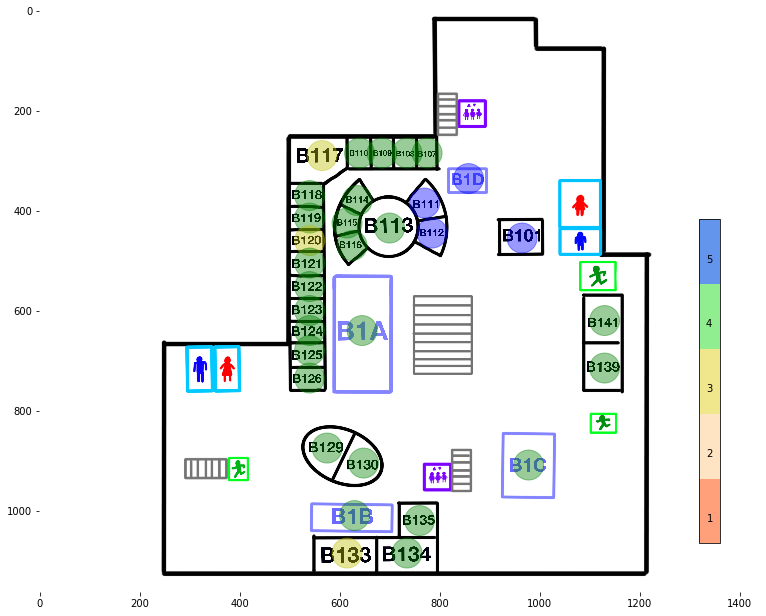

In [ ]:
# create circles with random locations: floor B1 -> B101 B111 B112 결측치 처리함

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
from matplotlib.colors import ListedColormap

imB1 = np.array(Image.open('/content/drive/Shared drives/2020 KU datathon/Visualization/floorB1-final.png'), dtype=np.uint8) # ****

floorB1roomid = data[data['floor']=='floorB'].roomid
NB1 = floorB1roomid.shape[0] # ****
xB1 = np.array(combinedB1.x) # ****
yB1 = np.array(combinedB1.y) # ****
floorB1roomid = np.array(data[data['floor']=='floorB'].roomid)
# colors
cB1=[]
for i in range(NB1):
  cB1.append(tuple(data[data['roomid']==floorB1roomid[i]]['color'].values))
cB1 = sum(cB1,())

from matplotlib.patches import Circle 
patch = [] 
for x1, y1, c1 in zip(xB1, yB1, cB1): 
    circle = Circle((x1, y1),30,linewidth=1, color=c1, fc = c1, ec = c1, alpha=0.4)
    patch.append(circle) 

# Create figure and axes
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1],frameon=False)

# Display the image
im= ax.imshow(imB1, interpolation = 'nearest')
cMap = ListedColormap(['lightsalmon', 'bisque', 'khaki', 'lightgreen', 'cornflowerblue'])

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax, width=0.3, height=4.5,  bbox_to_anchor=[670,280], loc='center')
sm = plt.cm.ScalarMappable(cmap=cMap)
cbar = fig.colorbar(sm,fraction=0.03,cax=cbaxes)

for j, lab in enumerate(['$1$','$2$','$3$','$4$','$5$']):
    cbar.ax.text(.5, (2 * j+0.8) / 10.0, lab, ha='center', va='center')
cbar.set_ticks([])


from matplotlib.collections import PatchCollection 
p=PatchCollection(patch, cB1)
ax.add_collection(p)


plt.show()


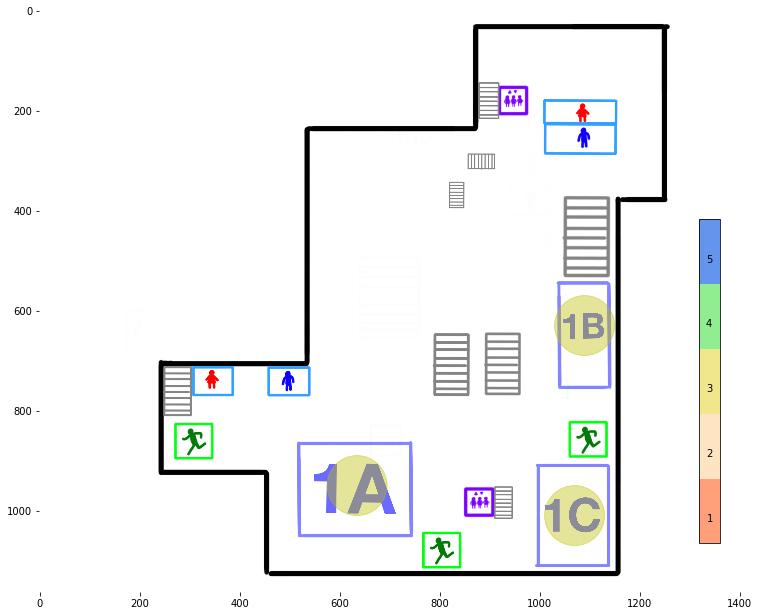

In [ ]:
# 1층 구현


import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np


im1 = np.array(Image.open('/content/drive/Shared drives/2020 KU datathon/Visualization/floor1-final.png'), dtype=np.uint8) # ****

floor1roomid = data[data['floor']=='floor1'].roomid
N1 = floor1roomid.shape[0] # ****
x1 = np.array(combined1.x) # ****
y1 = np.array([ 950.,  630., 1010.]) # 위치 조정함. 
floor1roomid = np.array(data[data['floor']=='floor1'].roomid)
# colors
c1=[]
for i in range(N1):
  c1.append(tuple(data[data['roomid']==floor1roomid[i]]['color'].values))
c1 = sum(c1,())

from matplotlib.patches import Circle 
patch = [] 
for x1, y1, c1 in zip(x1, y1, c1): 
    circle = Circle((x1, y1),60,linewidth=1, color=c1, fc = c1, ec = c1, alpha=0.4)
    patch.append(circle) 

# Create figure and axes
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1],frameon=False)

# Display the image
ax.imshow(im1, interpolation = 'nearest')
cMap = ListedColormap(['lightsalmon', 'bisque', 'khaki', 'lightgreen', 'cornflowerblue'])

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax, width=0.3, height=4.5,  bbox_to_anchor=[670,280], loc='center')
sm = plt.cm.ScalarMappable(cmap=cMap)
cbar = fig.colorbar(sm,fraction=0.03,cax=cbaxes)

for j, lab in enumerate(['$1$','$2$','$3$','$4$','$5$']):
    cbar.ax.text(.5, (2 * j+0.8) / 10.0, lab, ha='center', va='center')
cbar.set_ticks([])

from matplotlib.collections import PatchCollection 
p=PatchCollection(patch, c1)
ax.add_collection(p)


plt.show()


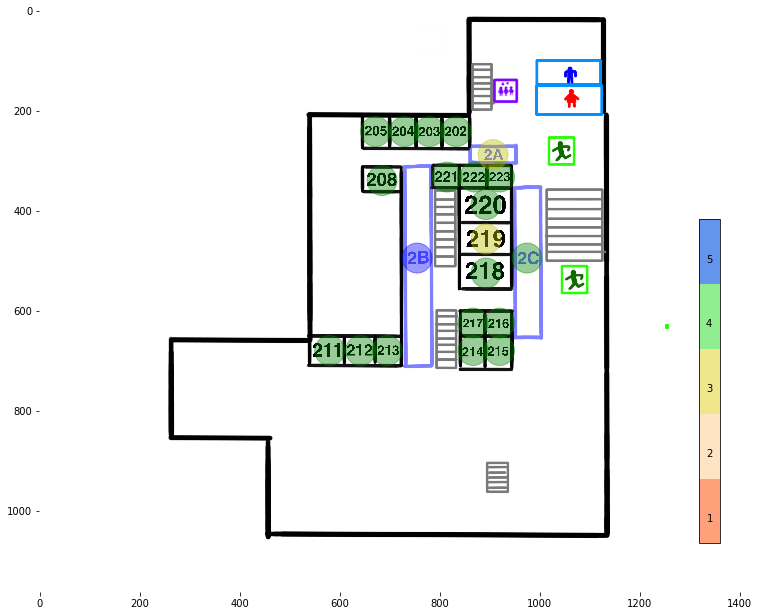

In [ ]:
# create circles with random locations: floor B1 -> B101 B111 B112 결측치 처리함

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np


im2 = np.array(Image.open('/content/drive/Shared drives/2020 KU datathon/Visualization/floor2-final.png'), dtype=np.uint8) # ****

floor2roomid = data[data['floor']=='floor2'].roomid
N2 = floor2roomid.shape[0] # ****
x2 = np.array(combined2.x) # ****
y2 = np.array(combined2.y) # ****
floor2roomid = np.array(data[data['floor']=='floor2'].roomid)
# colors
c2=[]
for i in range(N2):
  c2.append(tuple(data[data['roomid']==floor2roomid[i]]['color'].values))
c2 = sum(c2,())

from matplotlib.patches import Circle 
patch = [] 
for x1, y1, c1 in zip(x2, y2, c2): 
    circle = Circle((x1, y1),30,linewidth=1, color=c1, fc = c1, ec = c1, alpha=0.4)
    patch.append(circle) 

# Create figure and axes
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1],frameon=False)

# Display the image
ax.imshow(im2, interpolation = 'nearest')
cMap = ListedColormap(['lightsalmon', 'bisque', 'khaki', 'lightgreen', 'cornflowerblue'])

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax, width=0.3, height=4.5,  bbox_to_anchor=[670,280], loc='center')
sm = plt.cm.ScalarMappable(cmap=cMap)
cbar = fig.colorbar(sm,fraction=0.03,cax=cbaxes)

for j, lab in enumerate(['$1$','$2$','$3$','$4$','$5$']):
    cbar.ax.text(.5, (2 * j+0.8) / 10.0, lab, ha='center', va='center')
cbar.set_ticks([])

from matplotlib.collections import PatchCollection 
p=PatchCollection(patch, c2)
ax.add_collection(p)


plt.show()

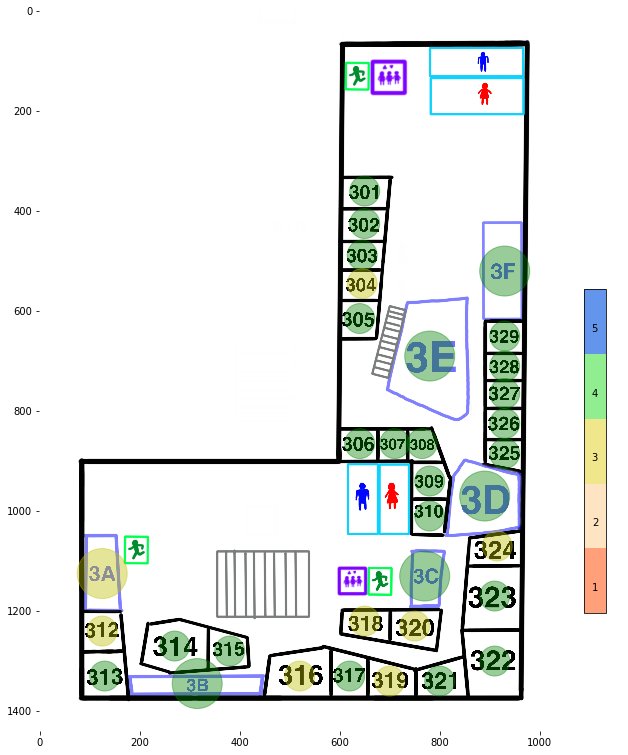

In [ ]:
# create circles with random locations: floor 3
# N3, x3, y3, c3

im3 = np.array(Image.open('/content/drive/Shared drives/2020 KU datathon/Visualization/floor3-final.png'), dtype=np.uint8) # ****

floor3roomid = data[data['floor']=='floor3'].roomid
N3 = floor3roomid.shape[0] # ****
x3 = np.array(combined3.x) # ****
y3 = np.array(combined3.y) # ****
floor3roomid = np.array(data[data['floor']=='floor3'].roomid)

# colors
c3=[]
for i in range(N3):
  c3.append(tuple(data[data['roomid']==floor3roomid[i]]['color'].values))
c3 = sum(c3,())

from matplotlib.patches import Circle 
patch = [] 
for x1, y1, c1 in zip(x3[:-6], y3[:-6], c3[:-6]): 
    circle = Circle((x1, y1),30,linewidth=1, color=c1, fc = c1, ec = c1, alpha=0.4)
    patch.append(circle) 
for x1, y1, c1 in zip(x3[-6:], y3[-6:], c3[-6:]): 
    circle = Circle((x1, y1),50,linewidth=1, color=c1, fc = c1, ec = c1, alpha=0.4)
    patch.append(circle) 



# Create figure and axes
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1],frameon=False)

# Display the image
ax.imshow(im3, interpolation = 'nearest')
cMap = ListedColormap(['lightsalmon', 'bisque', 'khaki', 'lightgreen', 'cornflowerblue'])

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax, width=0.3, height=4.5,  bbox_to_anchor=[625,280], loc='center')
sm = plt.cm.ScalarMappable(cmap=cMap)
cbar = fig.colorbar(sm,fraction=0.03,cax=cbaxes)

for j, lab in enumerate(['$1$','$2$','$3$','$4$','$5$']):
    cbar.ax.text(.5, (2 * j+0.8) / 10.0, lab, ha='center', va='center')
cbar.set_ticks([])

from matplotlib.collections import PatchCollection 
p=PatchCollection(patch, c3)
ax.add_collection(p)


plt.show()

In [ ]:
x4[-4:]

array([210., 748., 940., 700.])

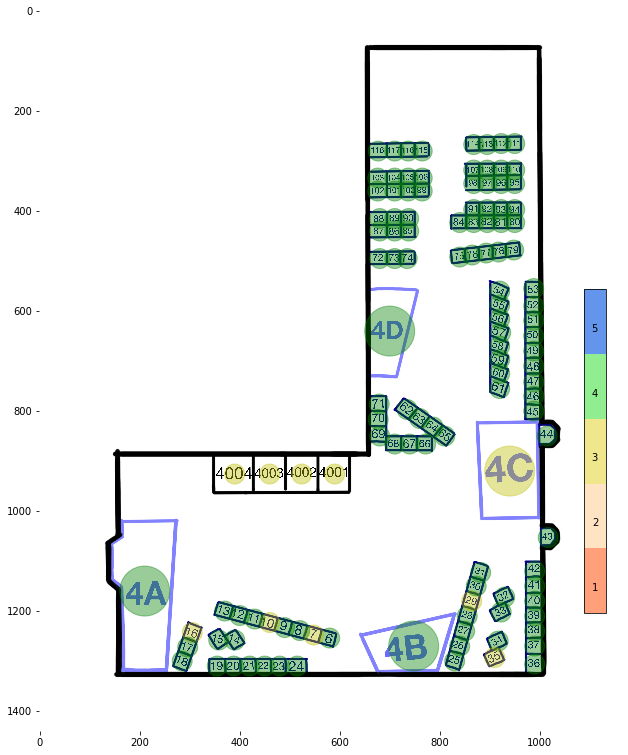

In [ ]:
# create circles with random locations: floor 4 -> 결측치 4096 4103 4105 4107 4108

im4 = np.array(Image.open('/content/drive/Shared drives/2020 KU datathon/Visualization/floor4.png'), dtype=np.uint8) # ****

floor4roomid = data[data['floor']=='floor4'].roomid
N4 = floor4roomid.shape[0] # ****
x4= np.array(combined4.x) # ****
y4 = np.array(combined4.y) # ****
floor4roomid = np.array(data[data['floor']=='floor4'].roomid)

# colors
c4=[]
for i in range(N4):
  c4.append(tuple(data[data['roomid']==floor4roomid[i]]['color'].values))
c4 = sum(c4,())

from matplotlib.patches import Circle 
patch = [] 
for x1, y1, c1 in zip(x4[:-4], y4[:-4], c4[:-4]): 
    circle = Circle((x1, y1),20,linewidth=1, color=c1, fc = c1, ec = c1, alpha=0.4)
    patch.append(circle) 

for x1, y1, c1 in zip(x4[-4:], y4[-4:], c4[-4:]): 
    circle = Circle((x1, y1),50,linewidth=1, color=c1, fc = c1, ec = c1, alpha=0.4)
    patch.append(circle) 


# Create figure and axes
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1],frameon=False)

# Display the image
ax.imshow(im4, interpolation = 'nearest')
cMap = ListedColormap(['lightsalmon', 'bisque', 'khaki', 'lightgreen', 'cornflowerblue'])

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax, width=0.3, height=4.5,  bbox_to_anchor=[625,280], loc='center')
sm = plt.cm.ScalarMappable(cmap=cMap)
cbar = fig.colorbar(sm,fraction=0.03,cax=cbaxes)

for j, lab in enumerate(['$1$','$2$','$3$','$4$','$5$']):
    cbar.ax.text(.5, (2 * j+0.8) / 10.0, lab, ha='center', va='center')
cbar.set_ticks([])

from matplotlib.collections import PatchCollection 
p=PatchCollection(patch, c4)
ax.add_collection(p)


plt.show()

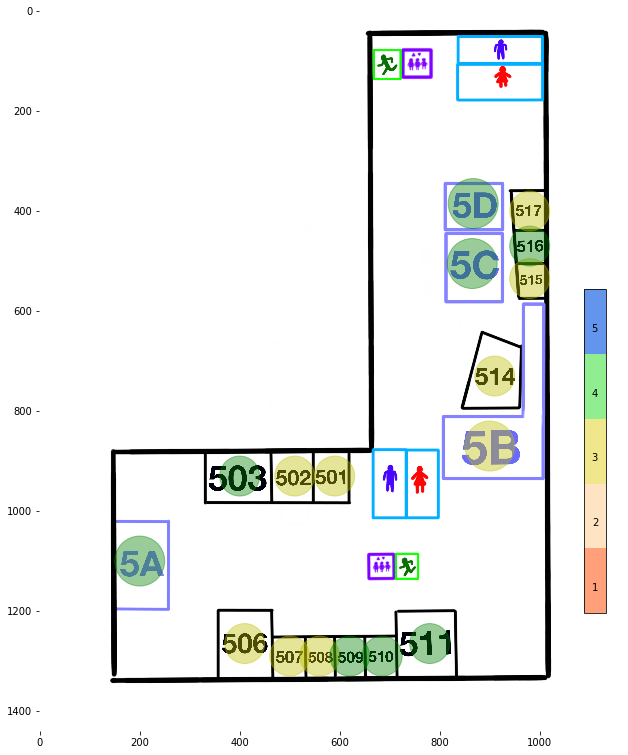

In [ ]:
# create circles with random locations: floor 5

im5 = np.array(Image.open('/content/drive/Shared drives/2020 KU datathon/Visualization/floor5-final.png'), dtype=np.uint8) # ****

floor5roomid = data[data['floor']=='floor5'].roomid
N5 = floor5roomid.shape[0] # ****
x5 = np.array(combined5.x) # ****
y5 = np.array(combined5.y) # ****
floor5roomid = np.array(data[data['floor']=='floor5'].roomid)

# colors
c5=[]
for i in range(N5):
  c5.append(tuple(data[data['roomid']==floor5roomid[i]]['color'].values))
c5 = sum(c5,())

from matplotlib.patches import Circle 
patch = [] 


for x1, y1, c1 in zip(x5[:-4], y5[:-4], c5[:-4]): 
    circle = Circle((x1, y1),40,linewidth=1, color=c1, fc = c1, ec = c1, alpha=0.4)
    patch.append(circle) 

for x1, y1, c1 in zip(x5[-4:], y5[-4:], c5[-4:]): 
    circle = Circle((x1, y1),50,linewidth=1, color=c1, fc = c1, ec = c1, alpha=0.4)
    patch.append(circle) 


# Create figure and axes
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1],frameon=False)

# Display the image
ax.imshow(im5, interpolation = 'nearest')
cMap = ListedColormap(['lightsalmon', 'bisque', 'khaki', 'lightgreen', 'cornflowerblue'])

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax, width=0.3, height=4.5,  bbox_to_anchor=[625,280], loc='center')
sm = plt.cm.ScalarMappable(cmap=cMap)
cbar = fig.colorbar(sm,fraction=0.03,cax=cbaxes)

for j, lab in enumerate(['$1$','$2$','$3$','$4$','$5$']):
    cbar.ax.text(.5, (2 * j+0.8) / 10.0, lab, ha='center', va='center')
cbar.set_ticks([])

from matplotlib.collections import PatchCollection 
p=PatchCollection(patch, c5)
ax.add_collection(p)


plt.show()